In [1944]:
from collections import defaultdict, Counter
import pandas as pd
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import generic_filter
from skimage.segmentation import flood
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_columns', 50)

In [3]:
def open_source(day):
    with open('source/{}.txt'.format(day), 'r') as f:
        lista = f.readlines()
    lista = [x.strip('\n') for x in lista]
    return lista

# Day 1

## Feladat 1

In [35]:
with open('source/day1_1.txt', 'r') as f:
    lista = f.readlines()

In [36]:
lista = [int(x.strip('\n')) for x in lista]

In [34]:
def nagyobb(lista):
    elozo = lista[0]
    eredmeny = 0
    for x in lista[1:]:
        if x > elozo:
            eredmeny += 1
        elozo = x
    return eredmeny

In [38]:
nagyobb(lista)

1390

## Feladat 2

In [28]:
def chunks(lista, chunk_size, overlap):
    for i in range(0, len(lista), overlap):
        if len(lista[i:i+chunk_size]) == 3:
            yield lista[i:i+chunk_size]

lista_3as = []            
for x in chunks(lista, 3, 1):
    lista_3as.append(sum(x))

In [39]:
nagyobb(lista_3as)

1457

# Day 2

## Feladat 1

In [ ]:
final horizontal * final depth

In [42]:
with open('source/day2.txt', 'r') as f:
    lista = f.readlines()
lista = [x.strip('\n') for x in lista]

In [47]:
horizontal_pos = 0
depth = 0
for x in lista:
    if 'forward' in x:
        horizontal_pos += int(x.split(' ')[-1])
    elif 'up' in x:
        depth -= int(x.split(' ')[-1])
    elif 'down' in x:
        depth += int(x.split(' ')[-1])

In [50]:
horizontal_pos * depth

1693300

## Feladat 2

In [51]:
horizontal_pos = 0
aim = 0
depth = 0
for x in lista:
    if 'up' in x:
        aim -= int(x.split(' ')[-1])
    elif 'down' in x:
        aim += int(x.split(' ')[-1])
    if 'forward' in x:
        horizontal_pos += int(x.split(' ')[-1])
        depth += int(x.split(' ')[-1]) * aim

In [54]:
horizontal_pos * depth

1857958050

# Day 3

## Feladat 1

In [65]:
def open_source(day):
    with open('source/{}.txt'.format(day), 'r') as f:
        lista = f.readlines()
    lista = [x.strip('\n') for x in lista]
    return lista

In [66]:
lista = open_source('day3')

In [74]:
dd = defaultdict(list)

In [97]:
#def count_binary()
dd = defaultdict(list)
gamma = ''
epsilon = ''
for i in range(len(lista[0])):
    for j in lista:
        dd[i].append(j[i])
    gamma += max(set(dd[i]), key=dd[i].count)
    epsilon += min(set(dd[i]), key=dd[i].count)    

In [101]:
int(gamma, 2) * int(epsilon, 2)

2640986

## Feladat 2

In [94]:
dd = defaultdict(list)
gamma = ''
epsilon = ''
for i in range(len(lista[0])):
    for j in lista:
        dd[i].append(j[i])

'0'

In [113]:
pandas_lista = [list(x) for x in lista]

In [115]:
df = pd.DataFrame(pandas_lista)

In [149]:
def melyik_o(df, pos):  
    if df.groupby([pos])[pos].count().iloc[0] > df.groupby([pos])[pos].count().iloc[1]:
        return '0'
    elif df.groupby([pos])[pos].count().iloc[0] < df.groupby([pos])[pos].count().iloc[1]:
        return '1'
    else:
        return '1'
    
def melyik_co(df, pos):  
    if df.groupby([pos])[pos].count().iloc[0] > df.groupby([pos])[pos].count().iloc[1]:
        return '1'
    elif df.groupby([pos])[pos].count().iloc[0] < df.groupby([pos])[pos].count().iloc[1]:
        return '0'
    else:
        return '0'

In [150]:
def melyik_o(df, pos):  
    if df.groupby([pos])[pos].count().iloc[0] > df.groupby([pos])[pos].count().iloc[1]:
        return '0'
    elif df.groupby([pos])[pos].count().iloc[0] < df.groupby([pos])[pos].count().iloc[1]:
        return '1'
    else:
        return '1'

oxigen = df.copy()
for col in oxigen.columns:
    marado = melyik_o(oxigen, col)
    oxigen = oxigen.loc[oxigen[col] == marado]
    if len(oxigen) == 1:
        break

In [158]:
co2 = df.copy()
for col in co2.columns:
    marado = melyik_co(co2, col)
    co2 = co2.loc[co2[col] == marado]
    if len(co2) == 1:
        break

In [162]:
int(co2.apply(''.join, axis=1).iloc[0], 2) * int(oxigen.apply(''.join, axis=1).iloc[0], 2)

6822109

# Day 4

## Feladat 1

In [630]:
with open('source/day4.txt', 'r') as f:
    lista = f.readlines()

In [631]:
boards = [list(filter(None, x.strip('\n').split(' '))) for x in lista[2:]]

In [625]:
def vert_match(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    if True in (a[0] == a).all(0):
        return True
    else:
        return False
    
def hori_match(df):
    if len(df[df.apply(lambda x: min(x) == max(x), 1)]) > 0:
        return True
    else:
        return False

list_of_boards = []
for x, y in zip(range(0, len(boards)+1, 6), range(5, len(boards)+1, 6)):
    list_of_boards.append(pd.DataFrame(boards[x:y]))
    
result = ''
result_df = ''
for i, num in enumerate(draw):
    for j, df in enumerate(list_of_boards):
        df.replace(num, 'x', inplace=True)
        if vert_match(df) or hori_match(df):
            result_df = df
            result = result_df.replace('x', 0).astype(int).sum().sum() * int(num)
            break
    else:
        continue
    break

In [629]:
result

64084

## Feladat 2

In [687]:
list_of_boards = []
for x, y in zip(range(0, len(boards)+1, 6), range(5, len(boards)+1, 6)):
    list_of_boards.append(pd.DataFrame(boards[x:y]))
    
result = ''
for i, num in enumerate(draw):
    for j, df in enumerate(list_of_boards):
        df.replace(num, 'x', inplace=True)
        if (vert_match(df) or hori_match(df)) and (len(list_of_boards) > 1):
            print("removed df: {} for num: {}".format(j, num))
            list_of_boards.pop(j)
        if num == '41':
            break
    else:
        continue
    break



removed df: 54 for num: 74
removed df: 42 for num: 26
removed df: 12 for num: 83
removed df: 12 for num: 77
removed df: 27 for num: 75
removed df: 7 for num: 56
removed df: 42 for num: 73
removed df: 64 for num: 86
removed df: 70 for num: 86
removed df: 87 for num: 86
removed df: 4 for num: 55
removed df: 12 for num: 55
removed df: 22 for num: 55
removed df: 66 for num: 55
removed df: 67 for num: 55
removed df: 38 for num: 36
removed df: 15 for num: 13
removed df: 75 for num: 52
removed df: 76 for num: 52
removed df: 75 for num: 63
removed df: 0 for num: 79
removed df: 15 for num: 79
removed df: 10 for num: 9
removed df: 17 for num: 10
removed df: 18 for num: 10
removed df: 53 for num: 10
removed df: 61 for num: 10
removed df: 1 for num: 16
removed df: 8 for num: 16
removed df: 34 for num: 16
removed df: 66 for num: 16
removed df: 68 for num: 16
removed df: 28 for num: 8
removed df: 47 for num: 8
removed df: 58 for num: 8
removed df: 11 for num: 69
removed df: 33 for num: 69
removed df

In [678]:
list_of_boards[0].replace('41', 'x')

,0,1,2,3,4
0,x,44,x,x,x
1,31,x,x,x,3
2,x,21,x,x,60
3,x,81,x,x,x
4,x,x,48,59,x


In [ ]:
list_of_boards = []
for x, y in zip(range(0, len(boards)+1, 6), range(5, len(boards)+1, 6)):
    list_of_boards.append(pd.DataFrame(boards[x:y]))
    
total_df = len(list_of_boards)
remaining_df = 0
for i, num in enumerate(draw):
    for j, df in enumerate(list_of_boards):
        df.replace(num, 'x', inplace=True)
        if vert_match(df) or hori_match(df):
            remanining_df += 1
            list
            break
    else:
        continue
    break

In [688]:
list_of_boards

[    0   1   2   3   4
 0   x  44   x   x   x
 1  31   x   x   x   3
 2   x  21  41   x  60
 3   x  81   x   x   x
 4   x   x  48  59   x,
     0   1   2   3   4
 0  67   x   x  88  89
 1   x   x   x  28   x
 2   x   x  60   x   x
 3  42   x   x   x   x
 4   x  62   x   x   x,
     0   1   2   3   4
 0   x   x   x  91   x
 1   x   x   x   3   x
 2   x  89  58   x   x
 3  29   x  48  44   x
 4   x   1  42   x  92]

In [721]:
list_of_boards = []

for x, y in zip(range(0, len(boards)+1, 6), range(5, len(boards)+1, 6)):
    list_of_boards.append(pd.DataFrame(boards[x:y]))
nyolc = [list_of_boards[8]]   
to_remove = []
for i, num in enumerate(draw):
    for j, df in enumerate(nyolc):
        df.replace(num, 'x', inplace=True)
        if (vert_match(df) or hori_match(df)):
            break
    else:
        continue
    break



In [724]:

nyolc[0].replace('x', 0).astype(int).sum().sum() * int(num)


12833

In [717]:
min(to_remove, key=to_remove.count)

8

In [719]:
[list_of_boards[8]]

[   0  1  2  3  4
 0  x  x  x  x  x
 1  x  x  x  x  x
 2  x  x  x  x  x
 3  x  x  x  x  x
 4  x  x  x  x  x]

# Day 5

## Feladat 1

In [3]:
with open('source/day5.txt', 'r') as f:
    lista = f.readlines()

In [4]:
floor = [re.split(' -> |,', x.strip('\n')) for x in lista]
floor = [[int(y) for y in x] for x in floor]

In [5]:
rmap = np.zeros((1000,1000), dtype=int)
df = pd.DataFrame(rmap)
df.index += 1
df.columns = [x+1 for x in df.columns]
# első az index

In [961]:
def add(e, m):
    df.loc[e, m] += 1

for l in floor:
    if l[0] == l[2]:
        # vertical le és fel
        df.loc[l[0], l[1]:l[3]] += 1
        df.loc[l[0], l[3]:l[1]] += 1
    elif l[1] == l[3]:
        # horizontal jobbra és balra
        df.loc[l[0]:l[2], l[1]] += 1
        df.loc[l[2]:l[0], l[1]] += 1

In [ ]:
df[df >= 2].count().sum()

## Feladat 2

In [6]:
def add(e, m):
    df.loc[e, m] += 1

for l in floor:
    if l[0] == l[2]:
        # vertical le és fel
        df.loc[l[0], l[1]:l[3]] += 1
        df.loc[l[0], l[3]:l[1]] += 1
    elif l[1] == l[3]:
        # horizontal jobbra és balra
        df.loc[l[0]:l[2], l[1]] += 1
        df.loc[l[2]:l[0], l[1]] += 1
    elif (l[0] < l[2]) and (l[1] < l[3]):
        # d jobbra le
        e = np.arange(l[0], l[2]+1, 1)
        m = np.arange(l[1], l[3]+1, 1)
        [add(x[0], x[1]) for x in zip(e, m)]
    elif (l[0] > l[2]) and (l[1] > l[3]):
        # d balra fel
        e = np.arange(l[0], l[2]-1, -1)
        m = np.arange(l[1], l[3]-1, -1)
        [add(x[0], x[1]) for x in zip(e, m)]
    elif (l[0] > l[2]) and (l[1] < l[3]):
        # d jobbra fel
        e = np.arange(l[0], l[2]-1, -1)
        m = np.arange(l[1], l[3]+1, 1)
        [add(x[0], x[1]) for x in zip(e, m)]
    elif (l[0] < l[2]) and (l[1] > l[3]):
        # d balra le
        e = np.arange(l[0], l[2]+1, 1)
        m = np.arange(l[1], l[3]-1, -1)
        [add(x[0], x[1]) for x in zip(e, m)]

In [963]:
df[df >= 2].count().sum()

18144

# Day 6

## Feladat 1-2

In [5]:
lista = open_source('day6')

In [28]:
start = lista[0].split(',')
start = [int(x) for x in start]
start = Counter(reversed(sorted(start)))
start

Counter({5: 32, 4: 28, 3: 32, 2: 33, 1: 175})

In [90]:
def breeding(current, r):
    if r == 0:
        return current
    else:
        next_round = {}
        for k, v in current.items():
            if k != 0:
                next_round[k-1] = next_round.get(k-1, 0) + v
            elif k == 0:
                next_round[6] = next_round.get(6, 0) + v
                next_round[8] = next_round.get(8, 0) + v
        return breeding(next_round, r-1)

In [105]:
asd = start.copy()
result = breeding(asd, 256)

In [106]:
sum(result.values())

1710623015163

# Day 7

## Feladat 1-2

In [110]:
lista = open_source('day7')
lista = lista[0].split(',')
lista = [int(x) for x in lista]

In [134]:
result = 10**100
for i in range(0, max(lista)):
    summ = 0
    for l in lista:
        diff = np.abs(l - i)
        diff = diff*(diff+1)/2
        summ += diff
    if summ < result:
        result = summ

In [135]:
result

96864235.0

# Day 8

## Feladat 1

In [136]:
lista = open_source('day8')

In [160]:
vege = [x.split(' | ')[-1].split(' ') for x in lista]
vege = [item for sublist in vege for item in sublist]
vege = [len(x) for x in vege if len(x) == 2 or len(x) == 3 or len(x) == 4 or len(x) == 7]

In [162]:
len(vege)

272

## Feladat 2

In [868]:
def get_dict(row):
    row_set = [set(x) for x in row]
    rdict = {}
    rdict['1'] = [x for x in row_set if len(x) == 2][0]
    rdict['4'] = [x for x in row_set if len(x) == 4][0]
    rdict['7'] = [x for x in row_set if len(x) == 3][0]
    rdict['8'] = [x for x in row_set if len(x) == 7][0]
    rdict['9'] = [x for x in row_set if rdict['4'].issubset(x) and len(x) == 6][0]
    rdict['3'] = [x for x in row_set if rdict['7'].issubset(x) and len(x) == 5][0]
    rdict['6'] = [x for x in row_set if not rdict['1'].issubset(x) and len(x) == 6][0]
    rdict['5'] = [x for x in row_set if x.issubset(rdict['6']) and len(x) == 5][0]
    rdict['0'] = [x for x in row_set if not rdict['5'].issubset(x) and len(x) == 6][0]
    rdict['2'] = [x for x in row_set if not x.issubset(rdict['5']) and not x.issubset(rdict['3']) and len(x) == 5][0]
    resdict = {}
    [resdict.update({''.join(sorted(list(v))): k}) for k, v in rdict.items()]
    return resdict

result = 0
for ele in lista:
    first = [''.join(sorted(x)) for x in ele.split(' | ')[0].split(' ')]
    second = [''.join(sorted(x)) for x in ele.split(' | ')[1].split(' ')]
    string_to_num = get_dict(first)
    result += int(''.join([string_to_num[x] for x in second]))
result

1007675

# Day 9

## Feladat 1

In [1900]:
lista = open_source('day9')

In [1901]:
lista = [[int(y) for y in x] for x in lista]

In [1935]:
bordering = [[j, k] for j in range(-1, 2) for k in range(-1, 2)]
bordering.remove([0, 0])
bordering

[[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]

In [1932]:
def get_border_9(l, bordering, i, j):
    res_list = []
    for c in bordering:
        p = []
        p.append(i+c[0])
        p.append(j+c[1])
        if (len(p) == 2 and 
            p[0] < len(l) and 
            p[1] < len(l[0]) and 
            p[0] >= 0 and 
            p[1] >= 0):
            res_list.append(p)
    return res_list

In [1954]:
result = 0
part_2 = np.zeros((len(lista), len(lista[0])))
for i in range(0, len(lista)):
    for j in range(0, len(lista[0])):
        if min([lista[x[0]][x[1]] for x in get_border_9(lista, bordering, i, j)]) > lista[i][j]:
            result += lista[i][j] + 1
            part_2[i,j] = 1
result

577

## Feladat 2

In [1942]:
a = np.array(lista)

In [1992]:
a[a < 9] = 1
basin_coords = np.nonzero(part_2)
sizes = []
for (x,y) in zip(*basin_coords):
    mask = flood(a, (x,y), tolerance=1, connectivity=1)
    sizes.append(mask.sum())

np.prod(sorted(sizes)[-3:])

1069200

In [1991]:
np.prod([99])

99

In [1958]:
basin_coords

C:\Users\kadarb\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 5, 5, 7, 7, 7, 7, 7, 8, 8, 8,
        8, 8, 9, 9, 9, 11, 12, 13, 13, 14, 14, 14, 14, 15, 16, 17, 17, 17,
        17, 18, 18, 19, 19, 21, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25,
        25, 25, 25, 26, 27, 27, 27, 28, 28, 29, 29, 29, 30, 30, 31, 31, 31,
        31, 33, 33, 34, 34, 34, 35, 36, 36, 36, 37, 37, 37, 38, 39, 40, 40,
        41, 41, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 45, 45, 46, 47, 47,
        47, 47, 48, 48, 48, 49, 49, 50, 51, 51, 52, 52, 53, 53, 53, 54, 54,
        55, 56, 56, 56, 56, 56, 57, 58, 58, 60, 61, 61, 61, 61, 61, 61, 62,
        62, 62, 63, 63, 64, 64, 65, 65, 65, 65, 67, 67, 68, 68, 69, 69, 69,
        69, 70, 70, 70, 71, 71, 73, 73, 73, 73, 74, 75, 75, 76, 76, 77, 78,
        78, 78, 79, 79, 79, 80, 80, 81, 82, 83, 83, 83, 84, 84, 84, 84, 85,
        85, 85, 85, 86, 86, 86, 87, 87, 87, 88, 89, 89, 89, 90, 90, 90, 91,
        92, 92, 92, 93, 93, 93, 94, 94, 95, 95, 95, 95, 96, 97, 98, 98, 98,
        99, 99,

In [1963]:
asd = [[1, 2], ['a', 'b']]

In [1965]:
for x in asd:
    print(x[0], x[1])

1 2
a b


In [1966]:
for x, y in zip(*asd):
    print(x, y)

1 a
2 b


In [1967]:
dictasd = {'1': 'a', '2': 'b'}

In [1972]:
for k, v in dictasd.items():
    print(k, v)

1 a
2 b


In [1974]:
for k, v in zip(**dictasd):
    print(k, v)

TypeError: zip() takes no keyword arguments

In [ ]:
for (x,y) in zip(*basin_coords):
    mask = flood(a, (x,y), tolerance=1, connectivity=1)
    sizes.append(mask.sum())


print(np.prod(sorted(sizes)[-3:]))

# Day 10

## Feladat 1-2

In [1134]:
lista = open_source('day10')

In [1161]:
scoring_1 = {')': 3, ']': 57, '}': 1197, '>': 25137}
scoring_2 = {'(': 1, '[': 2, '{': 3, '<': 4}

In [1148]:
result = 0
to_replace = ['<>', '()', '[]', '{}'] * 100
task_2 = []
for l in lista:
    for c in to_replace:
        l = l.replace(c, '')
    l_original = l
    for c in to_replace:
        l = l.replace(c[0], '')
    if len(l) == 0:
        task_2.append(l_original)
    else:
        result += scoring_1[l[0]]
result

339537

In [1171]:
from statistics import median

result = []
for l in task_2:
    partial = 0
    res = l[len(l)::-1]
    for c in res:
        partial *= 5
        partial += scoring_2[c]
    result.append(partial)

median(result)

2412013412

# Day 11

## Feladat 1

In [1525]:
lista = open_source('day11')
lista = [[int(x) for x in list(x)] for x in lista]

In [1526]:
df = np.array(lista)
shape = np.array(lista).shape

def flash(i, j):
    if df[i,j] == 0 and flashed[i,j]:
        return

    df[i,j] += 1

    if df[i,j] > 9:        
        df[i,j] = 0
        flashed[i,j] = True
        for i, j in get_border(i,j):  
            flash(i, j)
            
def get_border(i, j):
    res_list = []
    for c in bordering:
        p = []
        p.append(i+c[0])
        p.append(j+c[1])
        if (len(p) == 2 and 
            p[0] < shape[0] and 
            p[1] < shape[1] and 
            p[0] >= 0 and 
            p[1] >= 0):
            res_list.append(p)
    return res_list

In [1527]:
total_flash = 0

for r in range(0, 100):
    flashed = np.zeros(shape, dtype=bool)
    for i in range(shape[0]):
        for j in range(shape[1]):               
            flash(i, j)
    total_flash += np.count_nonzero(flashed)
    
total_flash

1608

## Feladat 2

In [1528]:
all_flash = True
r = 0
df = np.array(lista)

while all_flash:
    flashed = np.zeros(shape, dtype=bool)
    for i in range(shape[0]):
        for j in range(shape[1]):               
            flash(i, j)
    r += 1
    if np.count_nonzero(flashed) == 100:
        all_flash = False
        result = r

result

214

# Day 12

## Feladat 1

In [1542]:
lista = open_source('day12')

In [1543]:
lista = [tuple(x.split('-')) for x in lista]

In [1603]:
gf = nx.Graph()

In [1604]:
gf.add_edges_from(lista)

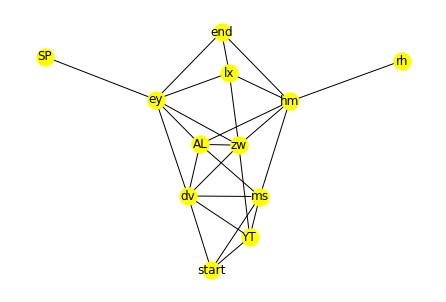

In [1608]:
nx.draw(gf, with_labels = True, node_color='yellow')

In [1612]:
len(list(nx.all_simple_paths(gf, 'start', 'end')))

961

In [1580]:
def add_path(path):
    if path[-1] == 'end':
        yield path
    for x in gf.neighbors(path[-1]):
        if x == x.lower() and x in path:
            continue
        yield from add_path(path + [x])

In [1581]:
len(list(add_path(['start'])))

3779

## Feladat 2

In [1635]:
def add_path_double(path, double=False):
    if path[-1] == 'end':
        yield path
    for x in gf.neighbors(path[-1]):
        double_next = double
        if x == x.lower() and x in path:
            if double_next:
                continue
            else:
                if x in ['start', 'end']:
                    continue
                double_next = True
        yield from add_path_double(path + [x], double_next)

In [1636]:
len(list(add_path_double(['start'])))

96988

# Day 13

## Feladat 1

In [1859]:
lista = open_source('day13')

In [1860]:
fold = [x for x in lista if 'fold' in x]
fold = [tuple([int(y) if 'x' not in y and 'y' not in y else y for y in x.split(' ')[-1].split('=')]) for x in fold]
coord = [tuple([int(x) for x in x.split(',')]) for x in lista if ',' in x]

In [1861]:
x_max = max([x[0] for x in coord]) + 1
y_max = max([x[1] for x in coord]) + 2

In [1862]:
arr = np.zeros((y_max, x_max))
for v in coord:
    arr[v[1], v[0]] = 1

In [1777]:
fold1 = 655
first = arr[:,:fold1]
second = np.flip(arr[:,fold1+1:], axis=1)
res = first + second
np.count_nonzero(res)

## Feladat 2

In [1864]:
for axis, value in fold:
    if axis == 'x':
        first = arr[:,:value]
        second = np.flip(arr[:,value+1:], axis=1)
    elif axis == 'y':
        first = arr[:value,:]
        second = np.flip(arr[value+1:,:], axis=0)
    res = first + second
    arr = res

In [1865]:
df = pd.DataFrame(arr)
df[df > 0] = 1
df.replace(0, '')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.0,1.0,1.0,1.0,,,,1.0,1.0,,,1.0,1.0,,,1.0,,,1.0,,,,1.0,1.0,,,1.0,1.0,,,,1.0,1.0,,,1.0,,,1.0,
1,1.0,,,,,,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,
2,1.0,1.0,1.0,,,,,,1.0,,1.0,,,1.0,,1.0,1.0,1.0,1.0,,,,,1.0,,1.0,,,,,1.0,,,1.0,,1.0,1.0,1.0,1.0,
3,1.0,,,,,,,,1.0,,1.0,1.0,1.0,1.0,,1.0,,,1.0,,,,,1.0,,1.0,,1.0,1.0,,1.0,1.0,1.0,1.0,,1.0,,,1.0,
4,1.0,,,,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,,1.0,,,1.0,
5,1.0,,,,,,1.0,1.0,,,1.0,,,1.0,,1.0,,,1.0,,,1.0,1.0,,,,1.0,1.0,1.0,,1.0,,,1.0,,1.0,,,1.0,


In [ ]:
11.20
3.14
6.00
20.34


In [1868]:
"123,456".split(',').astype(int)

AttributeError: 'list' object has no attribute 'astype'

In [ ]:
9 buttons, 2 hexagons, 2 squares, 3 rectangles, 1 triangle
4 red, 3 blue, 2 green


In [1866]:
20*60

1200

# Other random stuff

In [1184]:
label = ('a', 'b')
row1 = ('asd   ', 2)
row2 = ('basd   ', 4)

In [1185]:
dict(zip(label, tuple(zip(row1, row2))))

{'a': ('asd   ', 'basd   '), 'b': (2, 4)}

In [1187]:
rows = [('basd   ', 1), ('asd    ', '2')]

In [1199]:
df = pd.DataFrame(rows, columns=label)
df['a'].str.strip().to_list()

In [1198]:
df['a'] = [x.strip() for x in df['a']]

In [1219]:
dd = defaultdict(list)

In [1220]:
dicta = {}
for i, l in enumerate(label):
    for v in rows:
        if isinstance(v[i], str):
            dd[l].append(v[i].strip())
        else:
            dd[l].append(v[i])

In [1221]:
dd

defaultdict(list, {'a': ['basd', 'asd'], 'b': [1, '2']})